In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from operator import itemgetter
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('data/processed_final.csv')
df.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0


In [3]:
Y = df['fraud']
Y = Y.astype("category").cat.codes

In [12]:
X = df.drop(['fraud'],axis=1)
for columns in X:
    X[columns] = X[columns].astype('category').cat.codes
X.head(1)

,step,customer,age,gender,merchant,category,amount
0,0,210,4,2,30,12,455


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [91]:
def RandomForestC(X_train,X_test,y_train,y_test,n_estimators=10,max_features='auto',max_depth=None,criterion='gini',n_jobs=-1):
    model= RandomForestClassifier(n_estimators=n_estimators,
                                 max_features=max_features,
                                  max_depth=max_depth,
                                  n_jobs=n_jobs,
                                 criterion = criterion
                                 )
    model.fit(X_train,y_train.ravel())
    score = model.score(X_test,y_test.ravel())
    return(model,score)

In [93]:
model,score = RandomForestC(X_train,X_test, y_train ,y_test)
score

0.9959975783667429

In [84]:
def importance_bar_graph(model,x_data):
    importance=model.feature_importances_
    result=sorted(zip(importance,x_data),reverse=True)
    plt.title('Feature Importance')
    plt.bar(range(x_data.shape[1]),[each[0] for each in result],color='g',align='center')
    plt.xticks(range(X.shape[1]),[each[1] for each in result],rotation="30")
    plt.xlim([-1,x_data.shape[1]])
    plt.show()

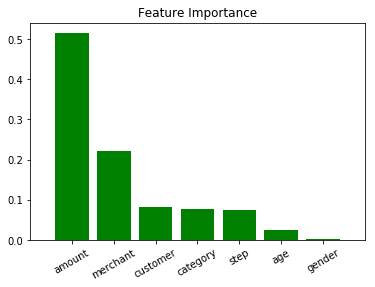

In [85]:
importance_bar_graph(model,X)

In [141]:
# Compute ROC curve and ROC area for each class
#y_predict = model.predict(X_test).tolist()
y_predict =model.predict(X_test).tolist()
fpr,tpr,thresholds=roc_curve(y_predict,list(y_test))
print(thresholds)
roc_auc = auc(fpr,tpr)

# confus_matr=confusion_matrix(y_predict,list(y_test))
# TP = confus_matr[0][0] # True Positive
# FN = confus_matr[0][1] # False Negative
# FP = confus_matr[1][0] # False Positive
# TN = confus_matr[1][1] # True Negative

[2 1 0]


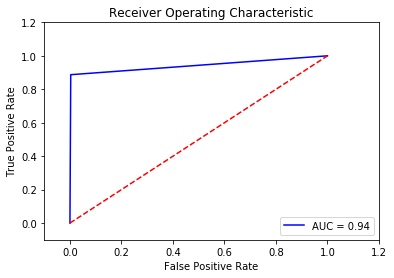

In [142]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# K Fold Cross Validation

In [88]:
kf=KFold(n_splits=20,random_state=True)
scorelist =[]
for train_index,test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],Y.iloc[train_index],Y.iloc[test_index]
    model,score = RandomForestC(X_train,X_test, y_train ,y_test)
    scorelist.append(score)
    print("Accuracy:" ,score)
print("avg score:", np.mean(scorelist))
    

Accuracy: 0.9940470184643325
Accuracy: 0.993777957151986
Accuracy: 0.994517875760939
Accuracy: 0.9964011839095923
Accuracy: 0.9950221983048567
Accuracy: 0.9957621418000807
Accuracy: 0.9951230996905691
Accuracy: 0.9957285080048432
Accuracy: 0.99630028252388
Accuracy: 0.9959975783667429
Accuracy: 0.9954258038477062
Accuracy: 0.9952912686667563
Accuracy: 0.9960984797524552
Accuracy: 0.996670254271492
Accuracy: 0.9961321135476927
Accuracy: 0.9958966769810306
Accuracy: 0.9970065922238666
Accuracy: 0.9960312121619803
Accuracy: 0.9959975783667429
Accuracy: 0.9963675501143548
avg score: 0.9956797686955949
